<img src="images/QISKit-c copy.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

# Hadamard Action: Approach 3
## Jupyter Notebook 3/3 for the *Teach Me QISKIT* Tutorial Competition
- Connor Fieweger

<img src="images/hadamard_action.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="750 px" align="left">

### Starting with QISKit:
In order to run this notebook, one must first download the Quantum Information Software Kit (QISKit) library from IBM at https://github.com/QISKit/qiskit-sdk-py (as well as supplementary libraries numpy and SciPy and an up-to-date version of python). 

One ought to also sign up for an IBM Q Experience account at https://quantumexperience.ng.bluemix.net/qx/experience in order to generate an APIToken (go to My Account > Advanced) for accessing the backends provided by IBM. The account sign up and APIToken specifcation is not actually necessary since this notebook assumes use of the local qasm simulator for the sake of simplicity, but its recommended, as seeing your code executed on an actual quantum device in some other location is really quite amazing and one of the unique capabilities of the QISKit library.

In [1]:
# import necessary libraries
import numpy as np
from pprint import pprint
from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram
#import Qconfig
# When working worth external backends (more on this below),
# be sure that the working directory has a 
# Qconfig.py file for importing your APIToken from 
# your IBM Q Experience account. 
# An example file has been provided, so for working
# in this notebook you can simply set 
# the variable values to your credentials and rename 
# this file as 'Qconfig.py'

The final approach to showing equivalence of the presented circuit diagrams is to implement the QISKit library in order to compute and  measure the final state. This is done by creating instances of classes in python that represent a circuit with a given set of registers and then using class methods on these circuits to make the class equivalent of gate operations on the qubits. The operations are then executed using a method that calls a backend, i.e. some computing machine invisible to the programmer, to perform the computation and then stores the results. The backend can either be a classical simulator that attempts to mimick the behavior of a quantum circuit as best as it can or an actual quantum computer chip in the dilution refrigerators at the Watson research center.  

In reading this notebook, one ought to dig around in the files for QISKit to find the relevant class and method definitions -- the particularly relevant ones in this notebook will be QuantumProgram, QuantumCircuit, and the Register family (ClassicalRegister, QuantumRegister, Register), so take some time now to read through these files.

## Circuit i)
For i), the initial state of the input is represented by the tensor product of the two input qubits in the initial register. This is given by:

$$|\Psi> = |\psi_1> \otimes |\psi_2> = |\psi_2\psi_1>$$

Where each |$\psi$> can be either |0> or |1>

*Note the convention change in the order of qubits in the product state representation on the right -- see appendix notebook under 'Reading a circuit diagram' for why there is a discrepancy here. This notebook will follow the above for consistency with IBM's documentation, which follows the same convention: (https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=beginners-guide&page=006-Multi-Qubit_Gates~2F001-Multi-Qubit_Gates)*

In [2]:
# This initial state register
# can be realized in python by creating an instance of the 
# QISKit QuantumProgram Class with a quantum register of 2 qubits 
# and 2 classical ancilla bits for measuring the states
i = QuantumProgram()

n = 2
i_q = i.create_quantum_register("i_q", n)
i_c = i.create_classical_register("i_c", n)

In [3]:
#i.set_api(Qconfig.APItoken, Qconfig.config['url']) # set the APIToken and API url

In [3]:
i.available_backends() #check backends - if you've set up your APIToken properly you
#should be able to see the quantum chips and simulators at IBM

['local_qiskit_simulator',
 'local_unitary_simulator',
 'local_clifford_simulator',
 'local_qasm_simulator']

https://github.com/QISKit/ibmqx-backend-information/tree/master/backends/ -- follow this url for background on how the quantum chips/simulators work.
*Note: when working with the quantum chip backends, especially when applying CNOTs, be sure to check documentation on the allowed two-qubit gate configurations.*

In [4]:
for backend in i.available_backends(): #check backend status
    print(backend)
    pprint(i.get_backend_status(backend))

local_qiskit_simulator
{'available': True}
local_unitary_simulator
{'available': True}
local_clifford_simulator
{'available': True}
local_qasm_simulator
{'available': True}


Throughout the notebook, we'll need to evaluate the final state of a given the circuit and display the results, so let's define a function for this:

In [5]:
def execute_and_plot(qp, circuits, backend = "local_qasm_simulator"):
    """Executes circuits and plots the final 
    state histograms the for each circuit.
    Adapted from 'execute_and_plot' function
    in the beginners_guide_composer_examples
    notebook provided in IBM's QISKit
    tutorial library on GitHub.
    
    Args:
        qp: QuantumProgram containing the circuits
        circuits (list): list of circuits to execute
        backend (string): allows for specifying the backend 
        to execute on. Defaults to local qasm simulator
        downloaded with QISKit library, but can be specified
        to run on an actual quantum chip by using the string
        names of the available backends at IBM.
    """
    # Store the results of the circuit implementation
    # using the .execute() method
    results = qp.execute(circuits, backend = backend)
 
    for circuit in circuits:
        plot_histogram(results.get_counts(circuit)) # .get_counts()
        # method returns a dictionary that maps each possible
        # final state to the number of instances of 
        # said state over n evaluations 
        # (n defaults to 1024 for local qasm simulator),
        # where multiple evaluations are a necessity since
        # quantum computation outputs are statistically
        # informed

Note: when working with the quantum chip backends, especially when applying CNOTs, be sure to check documentation on the allowed two-qubit gate configurations at: https://github.com/QISKit/ibmqx-backend-information/tree/master/backends/ . This program assumes use of the local qasm simulator.

Creating a QuantumCircuit instance and storing it in our QuantumProgram allows us to build up a set of operations to apply to this circuit through class methods and then execute this set of operation, so lets do this for each possible input state and read out the end result.

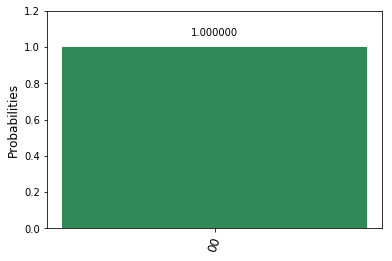

In [6]:
# Initialize circuit:
cnot_i_00 = i.create_circuit("cnot_i_00", [i_q], [i_c]) 
# Note: qubits are assumed by QISKit
# to be initialized in the |0> state

# Apply gates according to diagram:
cnot_i_00.cx(i_q[0], i_q[1]) # Apply CNOT on line 2 controlled by line 1

# Measure final state:
cnot_i_00.measure(i_q[0], i_c[0]) # Write qubit 1 state onto classical ancilla bit 1
cnot_i_00.measure(i_q[1], i_c[1]) # Write qubit 2 state onto classical ancilla bit 2

# Display final state probabilities:
execute_and_plot(i, ["cnot_i_00"])

*Note: The set of circuit operations to be executed can also be specified through a 'QASM', or a string that contains the registers and the set of operators to apply. We can get this string for the circuit we just made through the `.get_qasm()` method. This is also helpful for checking our implementation of the circuit, as we can read off the operations and make sure they match up with the diagram*

In [7]:
print(i.get_qasm('cnot_i_00'))

OPENQASM 2.0;
include "qelib1.inc";
qreg i_q[2];
creg i_c[2];
cx i_q[0],i_q[1];
measure i_q[0] -> i_c[0];
measure i_q[1] -> i_c[1];



*These QASM strings can also be used the other way around to create a circuit through the `.load_qasm_file()` and `load_qasm_text()` methods for the QuantumProgram class.*

Continuing input by input,

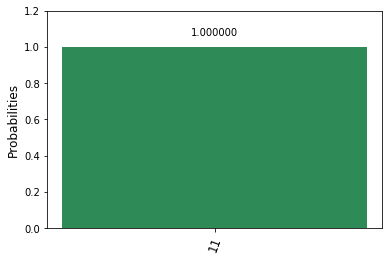

In [8]:
# Initialize circuit:
cnot_i_01 = i.create_circuit("cnot_i_01", [i_q], [i_c])
cnot_i_01.x(i_q[0]) # Set the 1st qubit to |1> by flipping 
# the initialized |0> with an X gate before implementing
# the circuit 

# Apply gates according to diagram:
cnot_i_01.cx(i_q[0], i_q[1]) # Apply CNOT controlled by line 1

# Measure final state:
cnot_i_01.measure(i_q[0], i_c[0])
cnot_i_01.measure(i_q[1], i_c[1])

# Display final state probabilities:
execute_and_plot(i, ["cnot_i_01"])

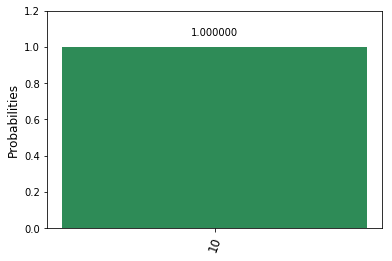

In [9]:
# Initialize circuit:
cnot_i_10 = i.create_circuit("cnot_i_10", [i_q], [i_c])
cnot_i_10.x(i_q[1]) # Set the 2nd qubit to |1>

# Apply gates according to diagram:
cnot_i_10.cx(i_q[0], i_q[1]) # Apply CNOT controlled by line 1

# Measure final state:
cnot_i_10.measure(i_q[0], i_c[0])
cnot_i_10.measure(i_q[1], i_c[1])

# Display final state probabilities:
execute_and_plot(i, ["cnot_i_10"])

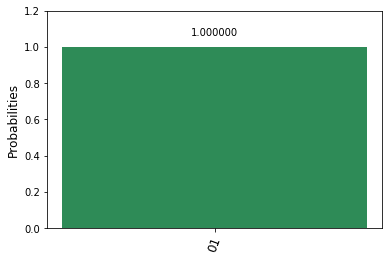

In [10]:
# Initialize circuit:
cnot_i_11 = i.create_circuit("cnot_i_11", [i_q], [i_c])
cnot_i_11.x(i_q[0]) # Set the 1st qubit to |1>
cnot_i_11.x(i_q[1]) # Set the 2nd qubit to |1>

# Apply gates according to diagram:
cnot_i_11.cx(i_q[0], i_q[1]) # Apply CNOT controlled by line 1

# Measure final states:
cnot_i_11.measure(i_q[0], i_c[0])
cnot_i_11.measure(i_q[1], i_c[1])

# Display final state probabilities:
execute_and_plot(i, ["cnot_i_11"])

Reading these off, we have $[\Psi = |00>,|10>,|01>,|11>]\rightarrow [\Psi' = |00>,|10>,|11>,|01>]$. 

Note that this is the same answer (up to convention in product-state notation) as obtained for approaches 1 and 2, only this time we have had a far less tedious time of writing out logic operations or matrices thanks to the QISKit library abstracting much of this away for us. While the numpy library was helpful for making linear algebra operations, the matrices had to be user defined and this method does not have nearly the scalability or ease of computation that QISKit offers.

## Circuit ii)

In [11]:
# For circuit ii, we can again create a QuantumProgram instance to 
# realize a quantum register of size 2 with 2 classical ancilla bits
# for measurement
ii = QuantumProgram()

n = 2
ii_q = ii.create_quantum_register("ii_q", n)
ii_c = ii.create_classical_register("ii_c", n)

In [14]:
#ii.set_api(Qconfig.APItoken, Qconfig.config['url']) # set the APIToken and API url   

In [12]:
ii.available_backends() #check backends - if you've set up your APIToken properly you
#should be able to see the quantum chips and simulators at IBM

['local_qiskit_simulator',
 'local_unitary_simulator',
 'local_clifford_simulator',
 'local_qasm_simulator']

In [13]:
for backend in ii.available_backends(): #check backend status
    print(backend)
    pprint(ii.get_backend_status(backend))

local_qiskit_simulator
{'available': True}
local_unitary_simulator
{'available': True}
local_clifford_simulator
{'available': True}
local_qasm_simulator
{'available': True}


Now for executing circuit ii):

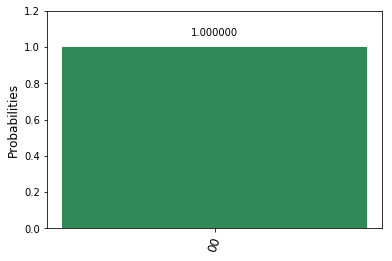

In [14]:
# Initialize circuit:
cnot_ii_00 = ii.create_circuit("cnot_ii_00", [ii_q], [ii_c])

# Apply gates according to diagram:
cnot_ii_00.h(ii_q) # Apply hadamards in parallel, note that specifying
# a register a a gate method argument applies the operation to all
# qubits in the register
cnot_ii_00.cx(ii_q[1], ii_q[0]) #apply CNOT controlled by line 2
cnot_ii_00.h(ii_q) # Apply hadamards in parallel

# Measure final state:
cnot_ii_00.measure(ii_q[0], ii_c[0])
cnot_ii_00.measure(ii_q[1], ii_c[1])

# Display final state probabilities
execute_and_plot(ii, ["cnot_ii_00"])

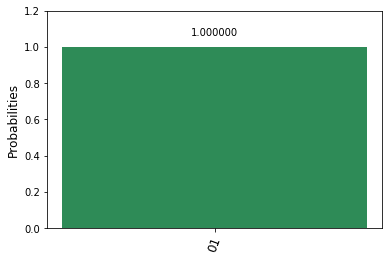

In [15]:
# Initialize circuit:
cnot_ii_01 = ii.create_circuit("cnot_ii_01", [ii_q], [ii_c])
cnot_ii_01.x(ii_q[0]) # Set the 1st qubit to |1>

# Apply gates according to diagram:
cnot_ii_00.h(ii_q) # Apply hadamards in parallel
cnot_ii_01.cx(ii_q[1], ii_q[0]) # Apply CNOT controlled by line 2
cnot_ii_00.h(ii_q) # Apply hadamards in parallel

# Measure final state:
cnot_ii_01.measure(ii_q[0], ii_c[0])
cnot_ii_01.measure(ii_q[1], ii_c[1])

# Display final state probabilities:
execute_and_plot(ii, ["cnot_ii_01"])

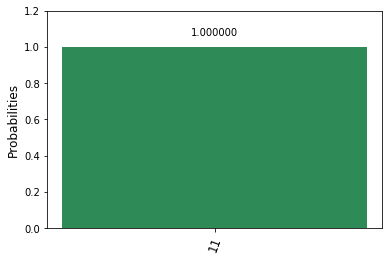

In [16]:
# Initialize circuits
cnot_ii_10 = ii.create_circuit("cnot_ii_10", [ii_q], [ii_c])
cnot_ii_10.x(ii_q[1]) # Set the 2nd qubit to |1>

# Apply gates according to diagram:
cnot_ii_00.h(ii_q) # Apply hadamards in parallel
cnot_ii_10.cx(ii_q[1], ii_q[0]) # Apply CNOT controlled by line 2
cnot_ii_00.h(ii_q) # Apply hadamards in parallel

# Measure final state:
cnot_ii_10.measure(ii_q[0], ii_c[0])
cnot_ii_10.measure(ii_q[1], ii_c[1])

# Display final state probabilities:
execute_and_plot(ii, ["cnot_ii_10"])

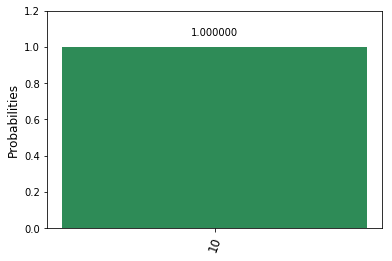

In [17]:
# Initialize circuits:
cnot_ii_11 = ii.create_circuit("cnot_ii_11", [ii_q], [ii_c])
cnot_ii_11.x(ii_q[0]) # Set the 1st qubit to |1>
cnot_ii_11.x(ii_q[1]) # Set the 2nd qubit to |1>

# Apply gates according to diagram:
cnot_ii_00.h(ii_q) # Apply hadamards in parallel
cnot_ii_11.cx(ii_q[1], ii_q[0]) # Apply CNOT controlled by line 2
cnot_ii_00.h(ii_q) # Apply hadamards in parallel

# Measure final state
cnot_ii_11.measure(ii_q[0], ii_c[0])
cnot_ii_11.measure(ii_q[1], ii_c[1])

# Display final state probabilities
execute_and_plot(ii, ["cnot_ii_11"])

Reading off the computed final state, we see that it matches the computed final state of i), and so the circuits are considered equivalent $\square$.

<hr>

### Another implementation:

The input-by-input approach is helpful for first steps in understanding QISKit, but is also more long-winded than necessary. For a solution to the problem that uses QISKit more concisely/cleverly:

In [18]:
def circuit_i():
    i = QuantumProgram()
    i_q = i.create_quantum_register('i_q', 2)
    i_c = i.create_classical_register('i_c', 2)
    initial_states = ['00','01','10','11']
    initial_circuits = {state: i.create_circuit('%s'%(state), [i_q], [i_c]) \
                       for state in initial_states}
    final_circuits = {}
    for state in initial_states:
        if state[0] is '1':
            initial_circuits[state].x(i_q[0])
        if state[1] is '1':
            initial_circuits[state].x(i_q[1])
            
        initial_circuits[state].cx(i_q[0], i_q[1])
        
        initial_circuits[state].measure(i_q[0], i_c[0])
        initial_circuits[state].measure(i_q[1], i_c[1])
        final_circuits[state] = initial_circuits[state]
    return i

In [19]:
def circuit_ii():
    ii = QuantumProgram()
    ii_q = ii.create_quantum_register('ii_q', 2)
    ii_c = ii.create_classical_register('ii_c', 2)
    initial_states = ['00','01','10','11']
    circuits = {state: ii.create_circuit('%s'%(state), [ii_q], [ii_c]) \
                       for state in initial_states}
    for state in initial_states:
        if state[0] is '1':
            circuits[state].x(ii_q[0])
        if state[1] is '1':
            circuits[state].x(ii_q[1])
            
        circuits[state].h(ii_q)
        circuits[state].cx(ii_q[1], ii_q[0])
        circuits[state].h(ii_q)
        
        circuits[state].measure(ii_q[0], ii_c[0])
        circuits[state].measure(ii_q[1], ii_c[1])
    return ii

In [20]:
i = circuit_i()
ii = circuit_ii()
#i.set_api(Qconfig.APItoken, Qconfig.config['url'])   
#ii.set_api(Qconfig.APItoken, Qconfig.config['url'])   

In [21]:
results_i = i.execute(list(i.get_circuit_names()))
results_ii = ii.execute(list(ii.get_circuit_names()))

In [22]:
results_i_mapping = {circuit: results_i.get_counts(circuit) for circuit in list(i.get_circuit_names())}
results_ii_mapping = {circuit: results_ii.get_counts(circuit) for circuit in list(ii.get_circuit_names())}

In [23]:
print(results_i_mapping)
print(results_ii_mapping)

{'01': {'10': 1024}, '10': {'11': 1024}, '00': {'00': 1024}, '11': {'01': 1024}}
{'01': {'10': 1024}, '10': {'11': 1024}, '00': {'00': 1024}, '11': {'01': 1024}}


$\square$.

## Next steps:

Thank you for reading through this tutorial! The author hopes that it has been a helpful experience in getting started with QISKit and quantum circuitry. For moving forward, consider the following projects:
   - Edit this notebook such that it can run on an actual quantum chip! By looking at the documentation/configuration of backends either online or through the `.get_backend_configuration()` method, you can find the connectivity map and then set up a circuit implementation that satisfies the 2-qubit gate constraints from this connectivity map. I strongly recommend this, as this is a vital step to unlocking the true power of QISKit, which is interfacing with actual quantum backends.
   - Implement an entirely different circuit.
   - Try generating circuits by uploading QASM strings.
   - Follow through with the provided tutorial files on the QISKit GitHub
   - Look through the provided further readings in the appendix notebook.
 